In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data_kosan = pd.read_csv("dataset kosan.csv")
display(data_kosan)


,Nomor,Nama Indekos,pria,wanita,campur,daerah,toilet_dalam,AC,harga,wifi,listrik
0,1,Jaya Kost,Iya,Tidak,Tidak,Belwis,Iya,Tidak,4000000,Tidak,Iya
1,2,CorHouse 2,Iya,Tidak,Tidak,Sukarame,Iya,Iya,5000000,Iya,Tidak
2,3,Kost ijo,Iya,Tidak,Tidak,Belwis,Iya,Tidak,5000000,Iya,Tidak
3,4,Molly,Iya,Tidak,Tidak,Sukarame,Tidak,Iya,7200000,Iya,Iya
4,5,Kosan pak burhan,Iya,Tidak,Tidak,Belwis,Iya,Tidak,5000000,Iya,Tidak
...,...,...,...,...,...,...,...,...,...,...,...
101,102,Kost Stella Atas,Tidak,Iya,Tidak,Jati Agung,Iya,Tidak,8000000,Iya,Tidak
102,103,Kost Tentrem Jama Jama Residence,Tidak,Tidak,Iya,Sukarame,Iya,Iya,14000000,Iya,Tidak
103,104,Kost Bayt Eksklusif,Tidak,Tidak,Iya,Sukarame,Iya,Iya,15000000,Iya,Tidak
104,105,Kost Classy Comfortable,Iya,Tidak,Tidak,Airan,Iya,Tidak,9600000,Iya,Tidak


In [2]:
df_melted = pd.melt(data_kosan, id_vars=['Nama Indekos', 'daerah'], 
                    value_vars=['pria', 'wanita', 'campur'],
                    var_name='gender', value_name='accepts')

# Filter only rows where the room accepts the gender
df_filtered = df_melted[df_melted['accepts'] == 'Iya']

# Group by area and gender and count the number of rooms
area_gender_count = df_filtered.groupby(['daerah', 'gender']).size().unstack(fill_value=0)

# Print the results
print(area_gender_count)

gender        campur  pria  wanita
daerah                            
Airan              4     5       7
Belwis             3     8       5
Jalan Tol          2     1       3
Jati Agung         4     3       3
Jati Sari          2     0       0
Kopri              3     1       7
Pemda Wahyui       2     1       3
Sukarame           9    10      20


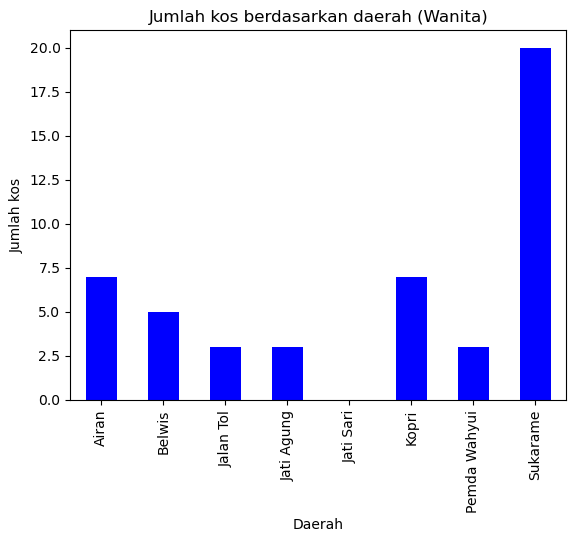

In [3]:
area_gender_count = df_filtered.groupby(['daerah', 'gender']).size().unstack(fill_value=0)

def plot_women():
    area_count_women = area_gender_count['wanita']
    area_count_women.plot(kind='bar', color='blue')
    plt.title('Jumlah kos berdasarkan daerah (Wanita)')
    plt.xlabel('Daerah')
    plt.ylabel('Jumlah kos')
    plt.show()

plot_women()

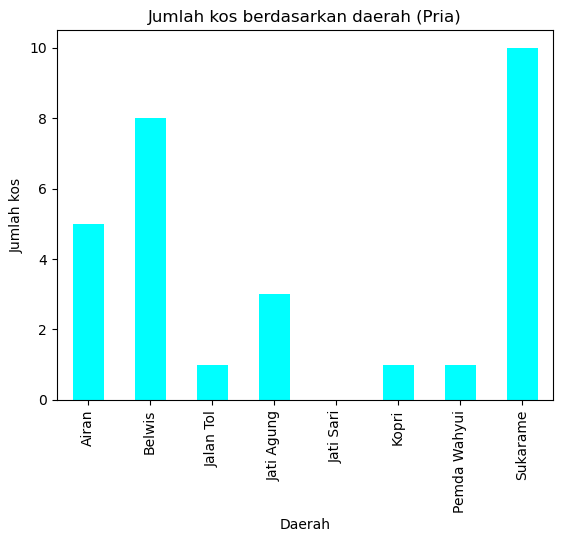

In [4]:
def plot_men():
    area_count_men = area_gender_count['pria']
    area_count_men.plot(kind='bar', color='cyan')
    plt.title('Jumlah kos berdasarkan daerah (Pria)')
    plt.xlabel('Daerah')
    plt.ylabel('Jumlah kos')
    plt.show()

plot_men()

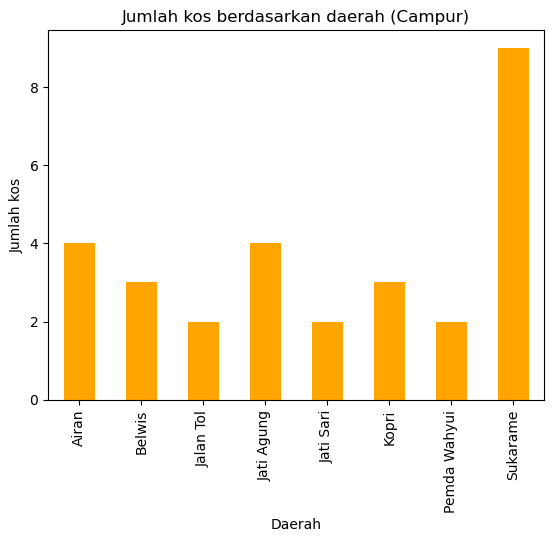

In [5]:
def plot_both():
    area_count_both = area_gender_count['campur']
    area_count_both.plot(kind='bar', color='orange')
    plt.title('Jumlah kos berdasarkan daerah (Campur)')
    plt.xlabel('Daerah')
    plt.ylabel('Jumlah kos')
    plt.show()

plot_both()

In [6]:
#print nilai pada tiap kolom

print(data_kosan['pria'].unique())
print(data_kosan['wanita'].unique())
print(data_kosan['campur'].unique())
print(data_kosan['daerah'].unique())
print(data_kosan['toilet_dalam'].unique())
print(data_kosan['AC'].unique())
print(data_kosan['wifi'].unique())
print(data_kosan['listrik'].unique())

['Iya' 'Tidak']
['Tidak' 'Iya']
['Tidak' 'Iya']
['Belwis' 'Sukarame' 'Jati Sari' 'Airan' 'Pemda Wahyui' 'Jati Agung'
 'Jalan Tol' 'Kopri']
['Iya' 'Tidak']
['Tidak' 'Iya']
['Tidak' 'Iya']
['Iya' 'Tidak']


In [7]:
#mengubah nilai pada tiap kolom menjadi huruf kecil

data_kosan['pria'] = data_kosan['pria'].str.lower()
data_kosan['wanita'] = data_kosan['wanita'].str.lower()
data_kosan['campur'] = data_kosan['campur'].str.lower()
data_kosan['daerah'] = data_kosan['daerah'].str.lower()
data_kosan['toilet_dalam'] = data_kosan['toilet_dalam'].str.lower()
data_kosan['AC'] = data_kosan['AC'].str.lower()
data_kosan['wifi'] = data_kosan['wifi'].str.lower()
data_kosan['listrik'] = data_kosan['listrik'].str.lower()

In [8]:
#print nilai pada tiap kolom

print(data_kosan['pria'].unique())
print(data_kosan['wanita'].unique())
print(data_kosan['campur'].unique())
print(data_kosan['daerah'].unique())
print(data_kosan['toilet_dalam'].unique())
print(data_kosan['AC'].unique())
print(data_kosan['wifi'].unique())
print(data_kosan['listrik'].unique())

['iya' 'tidak']
['tidak' 'iya']
['tidak' 'iya']
['belwis' 'sukarame' 'jati sari' 'airan' 'pemda wahyui' 'jati agung'
 'jalan tol' 'kopri']
['iya' 'tidak']
['tidak' 'iya']
['tidak' 'iya']
['iya' 'tidak']


In [9]:
# # label encoding
# from sklearn.preprocessing import LabelEncoder

# # Membuat objek LabelEncoder
# le = LabelEncoder()

# Pemetaan tiap daerah menjadi integer
daerah_map = {'belwis': 0, 'sukarame': 1, 'jati sari': 2, 'airan': 3, 'pemda wahyui': 4, 'jati agung': 5, 'jalan tol': 6, 'kopri': 7}
data_kosan['daerah'] = data_kosan['daerah'].map(daerah_map)

# Print pemetaan
print(daerah_map)

{'belwis': 0, 'sukarame': 1, 'jati sari': 2, 'airan': 3, 'pemda wahyui': 4, 'jati agung': 5, 'jalan tol': 6, 'kopri': 7}


In [10]:
# Label encoding kolom pria, wanita, campur, toilet_dalam, AC, wifi dan listrik

pria_map = {'tidak' : 0, 'iya' : 1}
data_kosan['pria'] = data_kosan['pria'].map(pria_map)

wanita_map = {'tidak' : 0, 'iya' : 1}
data_kosan['wanita'] = data_kosan['wanita'].map(wanita_map)

campur_map = {'tidak' : 0, 'iya' : 1}
data_kosan['campur'] = data_kosan['campur'].map(campur_map)

toilet_dalam_map = {'tidak' : 0, 'iya' : 1}
data_kosan['toilet_dalam'] = data_kosan['toilet_dalam'].map(toilet_dalam_map)

AC_map = {'tidak' : 0, 'iya' : 1}
data_kosan['AC'] = data_kosan['AC'].map(AC_map)

wifi_map = {'tidak' : 0, 'iya' : 1}
data_kosan['wifi'] = data_kosan['wifi'].map(wifi_map)

listrik_map = {'tidak' : 0, 'iya' : 1}
data_kosan['listrik'] = data_kosan['listrik'].map(listrik_map)

In [11]:
# Menghapus kolom nama indekos dan nomor

data_kosan.rename(columns={'Nama Indekos': 'nama_kos'}, inplace=True)
data_kosan = data_kosan.drop('Nomor', axis =1)

In [12]:
display (data_kosan)
data_kosan.to_csv('data_kosan.csv', index=False)

,nama_kos,pria,wanita,campur,daerah,toilet_dalam,AC,harga,wifi,listrik
0,Jaya Kost,1,0,0,0,1,0,4000000,0,1
1,CorHouse 2,1,0,0,1,1,1,5000000,1,0
2,Kost ijo,1,0,0,0,1,0,5000000,1,0
3,Molly,1,0,0,1,0,1,7200000,1,1
4,Kosan pak burhan,1,0,0,0,1,0,5000000,1,0
...,...,...,...,...,...,...,...,...,...,...
101,Kost Stella Atas,0,1,0,5,1,0,8000000,1,0
102,Kost Tentrem Jama Jama Residence,0,0,1,1,1,1,14000000,1,0
103,Kost Bayt Eksklusif,0,0,1,1,1,1,15000000,1,0
104,Kost Classy Comfortable,1,0,0,3,1,0,9600000,1,0


In [13]:
# Memberikan label pada harga dengan menggunakan Min Max Scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_kosan['harga'] = scaler.fit_transform(data_kosan[['harga']])

In [14]:
# Mengubah tipe data menjadi float

cols_to_convert = data_kosan.columns.drop('nama_kos')
data_kosan[cols_to_convert] = data_kosan[cols_to_convert].astype(float)


display(data_kosan)
data_kosan.to_csv('data_kosan.csv', index=False)

,nama_kos,pria,wanita,campur,daerah,toilet_dalam,AC,harga,wifi,listrik
0,Jaya Kost,1.0,0.0,0.0,0.0,1.0,0.0,0.027778,0.0,1.0
1,CorHouse 2,1.0,0.0,0.0,1.0,1.0,1.0,0.097222,1.0,0.0
2,Kost ijo,1.0,0.0,0.0,0.0,1.0,0.0,0.097222,1.0,0.0
3,Molly,1.0,0.0,0.0,1.0,0.0,1.0,0.250000,1.0,1.0
4,Kosan pak burhan,1.0,0.0,0.0,0.0,1.0,0.0,0.097222,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
101,Kost Stella Atas,0.0,1.0,0.0,5.0,1.0,0.0,0.305556,1.0,0.0
102,Kost Tentrem Jama Jama Residence,0.0,0.0,1.0,1.0,1.0,1.0,0.722222,1.0,0.0
103,Kost Bayt Eksklusif,0.0,0.0,1.0,1.0,1.0,1.0,0.791667,1.0,0.0
104,Kost Classy Comfortable,1.0,0.0,0.0,3.0,1.0,0.0,0.416667,1.0,0.0


In [15]:
# Input pengguna
gender_pref = input("Apakah anda sedang mencari kosan pria/wanita/campur? ")
location_pref = input("Daerah yang diinginkan (belwis, airan, jati agung, jati sari, pemda wayhui, jalan tol, kopri): ")
toilet_pref = input("Kamar mandi dalam? (iya/tidak) ")
ac_pref = input("Ruangan ber-AC? (iya/tidak) ")
wifi_pref = input("Kosan ber-wifi? (iya/tidak) ")
electricity_pref = input("Harga termasuk tagihan listrik? (iya/tidak) ")
price_pref = input("Masukkan harga dalam rupiah dalam 1 tahun (contoh:4000000) ")

Apakah anda sedang mencari kosan pria/wanita/campur? wanita
Daerah yang diinginkan (belwis, airan, jati agung, jati sari, pemda wayhui, jalan tol, kopri): kopri
Kamar mandi dalam? (iya/tidak) iya
Ruangan ber-AC? (iya/tidak) tidak
Kosan ber-wifi? (iya/tidak) iya
Harga termasuk tagihan listrik? (iya/tidak) iya
Masukkan harga dalam rupiah dalam 1 tahun (contoh:4000000) 9000000


In [16]:
# Preprocessing input
gender_pref = gender_pref.lower()
locatin_pref = location_pref.lower()
toilet_pref = toilet_pref.lower()
ac_pref = ac_pref.lower()
wifi_pref = wifi_pref.lower()
electricity_pref = electricity_pref.lower()


# Menyiapkan objek untuk menyimpan input
user_input = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])
user_input = user_input.astype(float)

In [17]:
# Menyimpan nilai ke dalam user_input

if gender_pref == "pria":
    user_input[0][0] = 1
elif gender_pref == "wanita":
    user_input[0][1] = 1
elif gender_pref == "campur":
    user_input[0][2] = 1

In [18]:
if location_pref == "belwis":
    user_input[0][3] = 0
elif location_pref == "sukarame":
    user_input[0][3] = 1
elif location_pref == "jati sari":
    user_input[0][3] = 2 
elif location_pref == "airan":
    user_input[0][3] = 3
elif location_pref == "pemda wayhui":
    user_input[0][3] = 4
elif location_pref == "jati agung":
    user_input[0][3] = 5
elif location_pref == "jalan tol":
    user_input[0][3] = 6
elif location_pref == "kopri":
    user_input[0][3] = 7

In [19]:
if toilet_pref == "iya":
    user_input[0][4] = 1
if toilet_pref == "tidak":
    user_input[0][4] = 0

In [20]:
if ac_pref == "iya":
    user_input[0][5] = 1
if ac_pref == "tidak":
    user_input[0][5] = 0

In [21]:
if wifi_pref == "iya":
    user_input[0][7] = 1
if wifi_pref == "tidak":
    user_input[0][7] = 0

In [22]:
if electricity_pref == "iya":
    user_input[0][8] = 1
if electricity_pref == "tidak":
    user_input[0][8] = 0

In [23]:

price_pref_scaled = scaler.transform([[price_pref]])[0][0]


C:\Users\Danny\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:

display( price_pref_scaled)

0.375

In [25]:
display(filtered_rows2)

NameError: name 'filtered_rows2' is not defined

In [31]:
user_input[0][6] = price_pref_scaled

In [32]:
user_input[0][6] = float(price_pref_scaled)

In [33]:
display (user_input)

array([[0.   , 1.   , 0.   , 7.   , 1.   , 0.   , 0.375, 1.   , 1.   ]])

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv("data_kosan.csv")

if user_input[0][0] == 1:
    df_edit = df[df['pria'] == 1]
#     if user_input[0][5] == 1:
#         df_edit = df[df['AC'] == 1]
#     elif user_input[0][5] == 0:
#         df_edit = df[df['AC'] == 0]
elif user_input[0][1] == 1:
    df_edit = df[df['wanita'] == 1]
#     if user_input[0][5] == 1:
#         df_edit = df[df['AC'] == 1]
#     elif user_input[0][5] == 0:
#         df_edit = df[df['AC'] == 0]    
elif user_input[0][2] == 1:
    df_edit = df[df['campur'] == 1]
#     if user_input[0][5] == 1:
#         df_edit = df[df['AC'] == 1]
#     elif user_input[0][5] == 0:
#         df_edit = df[df['AC'] == 0]
    

In [35]:
# df_edit = df_edit[df_edit['AC'] == user_input[0][5]]  
# df_edit = df_edit[df_edit['wifi'] == user_input[0][7]]

In [36]:
# Mengubah AC/WIFI

# Apply additional filters for AC, wifi, and price based on user weights
# df_edit = df_edit[df_edit['AC'] == user_input[0][5]]
# df_edit = df_edit[df_edit['wifi'] == user_input[0][7]]

In [37]:
display(df_edit)

,nama_kos,pria,wanita,campur,daerah,toilet_dalam,AC,harga,wifi,listrik
14,LaCasa 101 Female,0.0,1.0,0.0,5.0,1.0,0.0,0.333333,1.0,0.0
16,Kost Asri Ekslusif,0.0,1.0,0.0,1.0,1.0,1.0,0.791667,1.0,0.0
18,Kost Regina,0.0,1.0,0.0,4.0,1.0,0.0,0.166667,0.0,1.0
20,Kost Purizkha,0.0,1.0,0.0,1.0,1.0,0.0,0.166667,1.0,0.0
21,Kost Arta,0.0,1.0,0.0,1.0,1.0,0.0,0.166667,1.0,0.0
22,Kost Griya Senopati A,0.0,1.0,0.0,1.0,1.0,0.0,0.125000,0.0,0.0
24,Kost Galih Fam A,0.0,1.0,0.0,1.0,1.0,1.0,0.513889,1.0,0.0
25,Kost Linggau,0.0,1.0,0.0,1.0,1.0,0.0,0.250000,1.0,0.0
27,Kost Dagave,0.0,1.0,0.0,1.0,1.0,0.0,0.166667,0.0,1.0
28,Kost Marissa,0.0,1.0,0.0,1.0,1.0,1.0,0.583333,1.0,0.0


In [38]:
data_kosan_numeric = df_edit.drop(['nama_kos'], axis=1)

# Mengubah input menjadi vektor
user_vector = np.array([user_input])
user_vector = user_vector.reshape(1, -1)

# Menghitung similartias kosinus dari vektor input terhadap dataset
cosine_similarities = cosine_similarity(user_vector, data_kosan_numeric)


In [39]:
print(cosine_similarities)

[[0.98641012 0.59547542 0.97685261 0.68779627 0.68779627 0.71465526
  0.60941755 0.68697752 0.68779627 0.60660016 0.97008047 0.19868746
  0.95569369 0.97127155 0.9525517  0.91353916 0.97664287 0.98963571
  0.77768217 0.27861937 0.60660016 0.60660016 0.68579525 0.61173977
  0.68697752 0.98974429 0.19999287 0.77310677 0.6147978  0.1998227
  0.95548377 0.16569875 0.95177594 0.91440463 0.99013418 0.95163938
  0.99039806 0.96999986 0.97138622 0.99053489 0.70967872 0.97094269
  0.99959175 0.97813016 0.61173977 0.61354078 0.68071968 0.98645203]]


In [40]:
# Assuming df_edit is the filtered DataFrame based on user input
top_10_indices = np.argsort(cosine_similarities[0])[::-1][:10]
top_10_similarities = cosine_similarities[0][top_10_indices]

print("Top 10 recommendation:")
for i, similarity in zip(top_10_indices, top_10_similarities):
    nama_kos = df_edit.iloc[i]['nama_kos']  # Use iloc to access DataFrame by integer index
    print(f"Kos {i} {nama_kos}: {similarity}")


Top 10 recommendation:
Kos 42 Kost Pintaria: 0.9995917539680836
Kos 39 Kost Asrama Aziziyah: 0.9905348898998735
Kos 36 Kost Paradifa: 0.9903980649738009
Kos 34 Kost Alzaisaran: 0.9901341768249986
Kos 25 Kost Lia Family 2: 0.9897442935118408
Kos 17 Kost Sunflower B: 0.989635705812495
Kos 47 Kost Stella Atas: 0.986452034377461
Kos 0 LaCasa 101 Female: 0.9864101161166928
Kos 43 Kost Puri Tipe A: 0.9781301634316436
Kos 2 Kost Regina: 0.9768526111963355


In [109]:
# Assuming df_edit is the filtered DataFrame based on user input
top_10_indices = np.argsort(cosine_similarities[0])[::-1][:10]
top_10_similarities = cosine_similarities[0][top_10_indices]

print("Top 10 recommendation:")
for i, similarity in zip(top_10_indices, top_10_similarities):
    nama_kos = df_edit.iloc[i]['nama_kos']  # Use iloc to access DataFrame by integer index
    print(f"Kos {i} {nama_kos}: {similarity}")


Top 10 recommendation:
Kos 12 Kost Airan: 0.9687581867545718
Kos 20 Kost Lia Family: 0.9643749354994786
Kos 27 Kost Classy Comfortable: 0.9572701591769478
Kos 25 Kost M3: 0.9569585486646721
Kos 8 Kos Bude Tambal: 0.9559933731288716
Kos 23 Kost Fachri: 0.9516373068507322
Kos 10 Kost Jalan Durian: 0.9273230856085578
Kos 11 Kost 1453: 0.9273230856085578
Kos 9 Kos Hijau Wayhui: 0.9222549879641562
Kos 24 Kost Pesona Hijau: 0.9096282912403634


In [102]:
# Mengambil kosan-kosan tersebut
cosine_similarities_08_value = []
cosine_similarities_08_index = []
recommended_items = df.iloc[cosine_similarities_08]

recommended_items

NameError: name 'cosine_similarities_08' is not defined

In [99]:
# cosine_similarities_08_value,cosine_similarities_08_index

display(recommendation)

NameError: name 'recommendation' is not defined

In [106]:
print (cosine_similarities)

[[0.333676   0.77505892 0.50133064 0.64609877 0.50133064 0.5001287
  0.50163054 0.64623318 0.50133668 0.76982293 0.81696786 0.99979966
  0.88438504 0.91012438 0.92754324 0.94440898 0.62382241 0.94440898
  0.86115952 0.9817893  0.7223549  0.7223549  0.66762825 0.92740822
  0.63913455 0.7212482  0.88912811 0.57868211 0.63600268 0.88371456
  0.91675606 0.20811163 0.82202978 0.83314651 0.88472143 0.91685912
  0.7223549  0.88099831 0.87993902 0.33639853 0.66743781 0.91237609
  0.92451395 0.61343262 0.29207572 0.71550336 0.50133668 0.88472143
  0.63600268 0.83069842 0.63600268 0.71984353 0.64174954 0.50116516
  0.7212482  0.33602041 0.61637887 0.87938835 0.97064893 0.92461539
  0.60819398 0.76077705 0.92461539 0.81557259 0.20914096 0.61069159
  0.91294189 0.6453212  0.20901859 0.8217238  0.17287341 0.92740822
  0.91685912 0.88081566 0.92053794 0.95169182 0.57732639 0.91669164
  0.95722778 0.88082417 0.88914924 0.85633086 0.89720971 0.84086239
  0.8809747  0.88056283 0.66297919 0.87060048 0.8

In [189]:
display(df)

,nama_kos,pria,wanita,campur,daerah,toilet_dalam,AC,harga,wifi,listrik
0,Jaya Kost,1.0,0.0,0.0,0.0,1.0,0.0,0.027778,0.0,1.0
1,CorHouse 2,1.0,0.0,0.0,1.0,1.0,1.0,0.097222,1.0,0.0
2,Kost ijo,1.0,0.0,0.0,0.0,1.0,0.0,0.097222,1.0,0.0
3,Molly,1.0,0.0,0.0,1.0,0.0,1.0,0.250000,1.0,1.0
4,Kosan pak burhan,1.0,0.0,0.0,0.0,1.0,0.0,0.097222,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
101,Kost Stella Atas,0.0,1.0,0.0,5.0,1.0,0.0,0.305556,1.0,0.0
102,Kost Tentrem Jama Jama Residence,0.0,0.0,1.0,1.0,1.0,1.0,0.722222,1.0,0.0
103,Kost Bayt Eksklusif,0.0,0.0,1.0,1.0,1.0,1.0,0.791667,1.0,0.0
104,Kost Classy Comfortable,1.0,0.0,0.0,3.0,1.0,0.0,0.416667,1.0,0.0


In [110]:
# Menentukan median dan menkategorikan kos dengan harga di bawah median sebagai "kosan_murah"

median_price = df['harga'].median()

df['kosan_murah'] = df['harga'] <= median_price

In [111]:
kosan_murah = df[df['kosan_murah'] == True]
print(kosan_murah)

             nama_kos  pria  wanita  campur  daerah  toilet_dalam   AC  \
0           Jaya Kost   1.0     0.0     0.0     0.0           1.0  0.0   
1          CorHouse 2   1.0     0.0     0.0     1.0           1.0  1.0   
2            Kost ijo   1.0     0.0     0.0     0.0           1.0  0.0   
3               Molly   1.0     0.0     0.0     1.0           0.0  1.0   
4    Kosan pak burhan   1.0     0.0     0.0     0.0           1.0  0.0   
..                ...   ...     ...     ...     ...           ...  ...   
93    Kost Pak Rukino   0.0     0.0     1.0     1.0           1.0  0.0   
94         Kost Defva   0.0     0.0     1.0     0.0           1.0  0.0   
95      Kost Pintaria   0.0     1.0     0.0     7.0           1.0  0.0   
97   Kost Puri Tipe A   0.0     1.0     0.0     5.0           1.0  0.0   
105       Kost Nafiza   1.0     0.0     0.0     1.0           1.0  0.0   

        harga  wifi  listrik  kosan_murah  
0    0.027778   0.0      1.0         True  
1    0.097222   1.0    

In [112]:
print (median_price)

0.2499999999999999


In [49]:
n_kosan_murah = df['kosan_murah'].sum()
print(f"Banyaknya kosan_murah: {n_kosan_murah}")

Banyaknya kosan_murah: 66


In [100]:
# Mengambil kosan-kosan tersebut
recommended_items = df.iloc[cosine_similarities_08_index]

recommended_items

NameError: name 'cosine_similarities_08_index' is not defined

In [116]:
cosine_similarities_08_value = []
cosine_similarities_08_index = []
i=0

for ele in cosine_similarities[0]:
    if ele >= 0.7:
        cosine_similarities_08_index.append(i)
        cosine_similarities_08_value.append(ele)
    i = i+1
    
# Menyimpan hasil rekomendasi dengan threshold tertentu
recommended_items = df.iloc[cosine_similarities_08_index]

In [117]:
# Hitung TP FP FN TN
TP = sum((df['nama_kos'].isin(recommended_items['nama_kos'])) & (df['kosan_murah']))
FP = sum((df['nama_kos'].isin(recommended_items['nama_kos'])) & (~df['kosan_murah']))
FN = sum((~df['nama_kos'].isin(recommended_items['nama_kos'])) & (df['kosan_murah']))
TN = sum((~df['nama_kos'].isin(recommended_items['nama_kos'])) & (~df['kosan_murah']))

print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")


TP: 43, FP: 22, FN: 23, TN: 18


In [118]:
# Hitung confusion matrix
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FP + FN + TN) * 100

# Print confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print(f"Accuracy: {accuracy:.2f}%")

Precision: 0.6615384615384615
Recall: 0.6515151515151515
F1-score: 0.6564885496183206
Accuracy: 57.55%


In [119]:
cosine_similarities_08_value = []
cosine_similarities_08_index = []
i=0

for ele in cosine_similarities[0]:
    if ele >= 0.65:
        cosine_similarities_08_index.append(i)
        cosine_similarities_08_value.append(ele)
    i = i+1
    

# Mengambil kosan-kosan tersebut
recommended_items = df.iloc[cosine_similarities_08_index]

In [120]:
# Hitung TP FP FN TN
TP = sum((df['nama_kos'].isin(recommended_items['nama_kos'])) & (df['kosan_murah']))
FP = sum((df['nama_kos'].isin(recommended_items['nama_kos'])) & (~df['kosan_murah']))
FN = sum((~df['nama_kos'].isin(recommended_items['nama_kos'])) & (df['kosan_murah']))
TN = sum((~df['nama_kos'].isin(recommended_items['nama_kos'])) & (~df['kosan_murah']))

print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")


TP: 45, FP: 23, FN: 21, TN: 17


In [121]:
# Hitung confusion matrix
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FP + FN + TN) * 100

# Print confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print(f"Accuracy: {accuracy:.2f}%")

Precision: 0.6617647058823529
Recall: 0.6818181818181818
F1-score: 0.6716417910447761
Accuracy: 58.49%


In [57]:
cosine_similarities_08_value = []
cosine_similarities_08_index = []
i=0

for ele in cosine_similarities[0]:
    if ele >= 0.6:
        cosine_similarities_08_index.append(i)
        cosine_similarities_08_value.append(ele)
    i = i+1
    
# Mengambil kosan-kosan tersebut
recommended_items = df.iloc[cosine_similarities_08_index]

In [58]:
# Hitung TP FP FN TN
TP = sum((df['nama_kos'].isin(recommended_items['nama_kos'])) & (df['kosan_murah']))
FP = sum((df['nama_kos'].isin(recommended_items['nama_kos'])) & (~df['kosan_murah']))
FN = sum((~df['nama_kos'].isin(recommended_items['nama_kos'])) & (df['kosan_murah']))
TN = sum((~df['nama_kos'].isin(recommended_items['nama_kos'])) & (~df['kosan_murah']))

print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")


TP: 49, FP: 37, FN: 17, TN: 3


In [59]:
# Hitung confusion matrix
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (TP + TN) / (TP + FP + FN + TN) * 100

# Print confusion matrix
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
print(f"Accuracy: {accuracy:.2f}%")

Precision: 0.5697674418604651
Recall: 0.7424242424242424
F1-score: 0.6447368421052633
Accuracy: 49.06%


In [105]:
pd.set_option('display.max_rows', None)

# Display the DataFrame
display(df)

# Reset the option to its default value (to avoid displaying all rows in subsequent operations)
pd.set_option('display.max_rows', 10)  # Set to the desired value (e.g., 10) if you want to limit the display again

,nama_kos,pria,wanita,campur,daerah,toilet_dalam,AC,harga,wifi,listrik
0,Jaya Kost,1.0,0.0,0.0,0.0,1.0,0.0,0.027778,0.0,1.0
1,CorHouse 2,1.0,0.0,0.0,1.0,1.0,1.0,0.097222,1.0,0.0
2,Kost ijo,1.0,0.0,0.0,0.0,1.0,0.0,0.097222,1.0,0.0
3,Molly,1.0,0.0,0.0,1.0,0.0,1.0,0.250000,1.0,1.0
4,Kosan pak burhan,1.0,0.0,0.0,0.0,1.0,0.0,0.097222,1.0,0.0
5,Kost Pak Sentot,1.0,0.0,0.0,0.0,1.0,0.0,0.027778,1.0,0.0
6,Kost ijo 2,1.0,0.0,0.0,0.0,1.0,0.0,0.201389,1.0,0.0
7,Corhouse,0.0,0.0,1.0,1.0,1.0,1.0,0.236111,1.0,0.0
8,DWS,1.0,0.0,0.0,0.0,1.0,0.0,0.236111,1.0,0.0
9,Joesi,0.0,0.0,1.0,2.0,1.0,1.0,0.305556,1.0,1.0


In [60]:
#print hasil

print (recommended_items.shape)
print (recommended_items)

(86, 11)
                             nama_kos  pria  wanita  campur  daerah  \
1                          CorHouse 2   1.0     0.0     0.0     1.0   
3                               Molly   1.0     0.0     0.0     1.0   
7                            Corhouse   0.0     0.0     1.0     1.0   
9                               Joesi   0.0     0.0     1.0     2.0   
10                            Joesi 2   0.0     0.0     1.0     2.0   
..                                ...   ...     ...     ...     ...   
101                  Kost Stella Atas   0.0     1.0     0.0     5.0   
102  Kost Tentrem Jama Jama Residence   0.0     0.0     1.0     1.0   
103               Kost Bayt Eksklusif   0.0     0.0     1.0     1.0   
104           Kost Classy Comfortable   1.0     0.0     0.0     3.0   
105                       Kost Nafiza   1.0     0.0     0.0     1.0   

     toilet_dalam   AC     harga  wifi  listrik  kosan_murah  
1             1.0  1.0  0.097222   1.0      0.0         True  
3           

In [123]:
kos_b = df[df['nama_kos'].str.contains('jaya kost', case=False)]
print (kos_b)

    nama_kos  pria  wanita  campur  daerah  toilet_dalam   AC     harga  wifi  \
0  Jaya Kost   1.0     0.0     0.0     0.0           1.0  0.0  0.027778   0.0   

   listrik  kosan_murah  
0      1.0         True  


In [127]:
sorted_values = sorted(cosine_similarities_08_value, reverse=True)
for value in sorted_values:
        print (value)

1.0
0.9997996629940495
0.9974356124772553
0.9817892960324527
0.9706489319732713
0.9572277770509577
0.9516918249286359
0.944408976198932
0.944408976198932
0.9275843126908513
0.9275432445109426
0.9274082249457698
0.9274082249457698
0.9246153934831773
0.9246153934831773
0.9245139512631853
0.9209111413560694
0.9205379421543884
0.9168591224018476
0.9168591224018475
0.9167560588587739
0.9166916411521914
0.9129418919778111
0.9123760883219795
0.91181685977004
0.910124379799929
0.897209714918397
0.8891492387265519
0.8891281093183782
0.8891281093183782
0.8847214282117459
0.8847214282117459
0.8843850407000237
0.8837145613534675
0.8809983069204365
0.8809746976794127
0.8808241697895139
0.8808156610931857
0.8805628324830278
0.8799390170255342
0.8793883498359999
0.8706004815877715
0.8611595235228275
0.857225486847251
0.8563308591985368
0.8408623927102166
0.8331465067322743
0.8331465067322743
0.830698415588539
0.8304119614463963
0.8220297846915764
0.8217237951565683
0.8169678632647616
0.81557259477279